# Mini Project 1-Stock Market Analysis Using Python

## Read the Data from Yahoo finance website directly.

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data
start = '2023-01-01'
end = '2023-12-01'
tech_stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
stock_data_dict = {}
for stock in tech_stocks:
    stock_data_dict[stock] = download_stock_data(stock, start, end)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [67]:
stock_data_dict[stock].describe()

,Open,High,Low,Close,Adj Close,Volume
count,230.000000,230.000000,230.000000,230.000000,230.000000,2.300000e+02
mean,118.746044,120.315130,117.278739,118.898783,118.898783,5.989900e+07
std,17.712423,17.661821,17.660015,17.624782,17.624782,2.106802e+07
min,83.029999,85.419998,81.430000,83.120003,83.120003,2.237840e+07
25%,101.162502,102.594999,99.539999,102.052502,102.052502,4.627712e+07
50%,125.139999,127.099998,124.070000,125.634998,125.634998,5.524980e+07
75%,133.335003,134.040005,131.687504,133.127499,133.127499,6.771152e+07
max,147.850006,149.259995,146.880005,147.729996,147.729996,1.581542e+08


## Perform cleaning.

In [71]:
stock_data_dict[stock].isna().sum() #Checking for null values
stock_data_dict[stock].duplicated().sum() #Checking for duplicates

0

## What was the change in stock price over time?

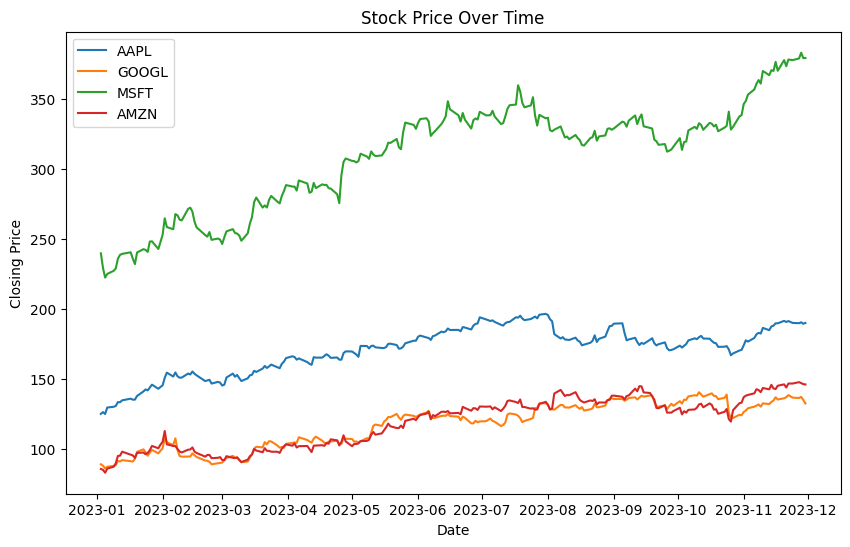

In [72]:
plt.figure(figsize=(10, 6))
for stock, data in stock_data_dict.items():
    plt.plot(data['Close'], label=stock)

plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

 ## Visualize the change in a stock’s volume being traded, over time?

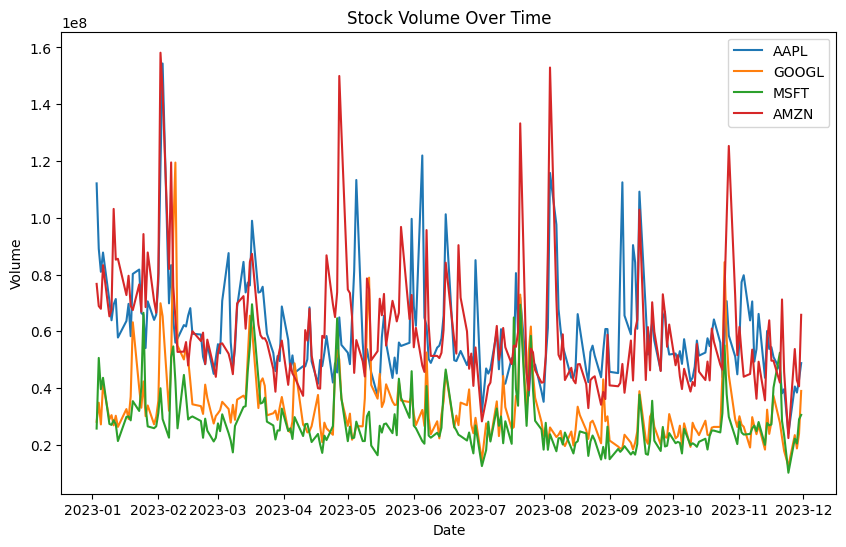

In [93]:
plt.figure(figsize=(10, 6))
for stock, data in stock_data_dict.items():
 plt.plot(data['Volume'], label=stock)

plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

## What was the moving average of various stocks?

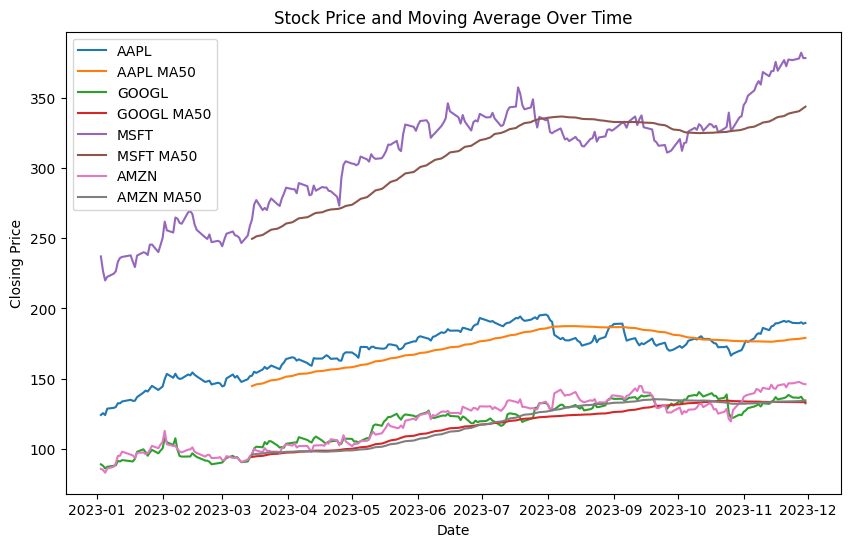

In [97]:
plt.figure(figsize=(10, 6))
for stock, data in stock_data_dict.items():
    data['MA50'] = data['Close'].rolling(window=50).mean()
    plt.plot(data['Adj Close'], label=stock)
    plt.plot(data['MA50'], label=f'{stock} MA50')

plt.title('Stock Price and Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## What was the daily return average of a stock?

In [113]:
for stock, data in stock_data_dict.items():
    data['Daily Return'] = data['Adj Close'].pct_change()


<Axes: xlabel='Date'>

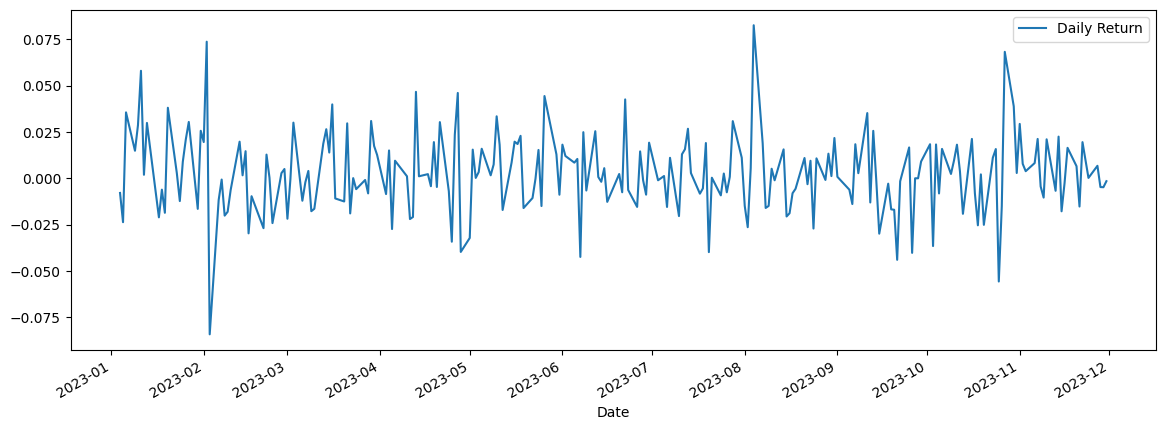

In [116]:
data['Daily Return'].plot(figsize=(14,5),legend=True)


## Add a new column ‘Trend’ whose values are based on the 'Daily Return'

In [118]:
for stock, data in stock_data_dict.items():
    data['Trend'] = ['Up' if x > 0 else 'Down' if x < 0 else 'Neutral' for x in data['Daily Return']]
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA50,Daily Return,Trend
Date,,,,,,,,,
2023-11-24,146.699997,147.199997,145.320007,146.740005,146.740005,22378400,133.912801,0.000204,Up
2023-11-27,147.529999,149.259995,146.880005,147.729996,147.729996,53762400,134.059601,0.006747,Up
2023-11-28,146.979996,147.600006,145.529999,147.029999,147.029999,42711700,134.200601,-0.004738,Down
2023-11-29,147.850006,148.539993,145.970001,146.320007,146.320007,40610900,134.374401,-0.004829,Down
2023-11-30,144.759995,146.929993,144.330002,146.089996,146.089996,65814000,134.590401,-0.001572,Down


## Visualize trend frequency through a Pie Chart

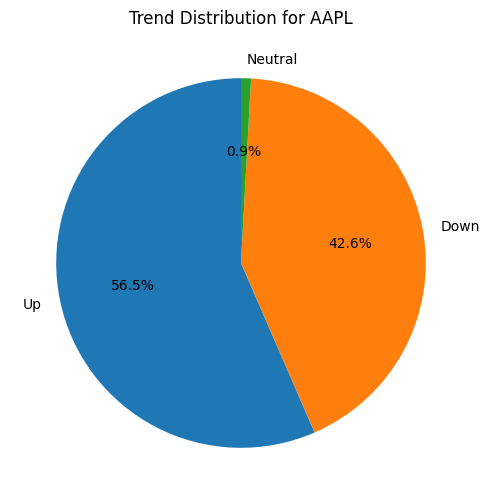

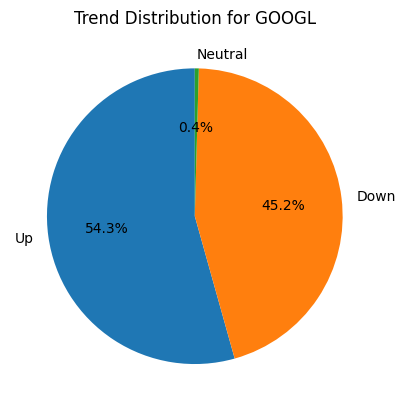

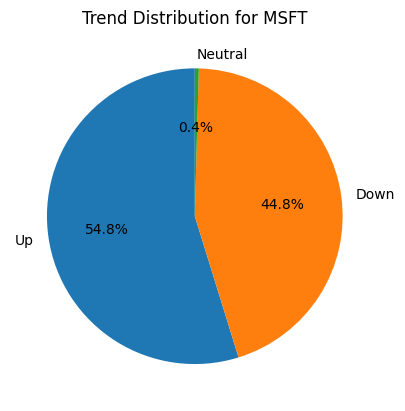

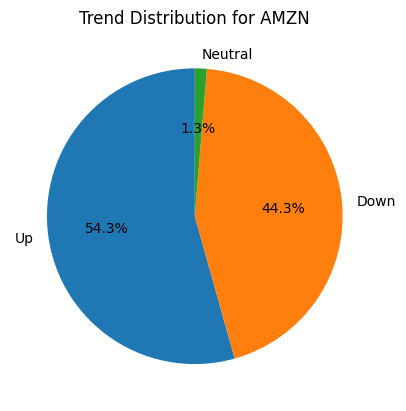

In [123]:
plt.figure(figsize=(6,6))
for stock, data in stock_data_dict.items():
    trend_counts = data['Trend'].value_counts()
    plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Trend Distribution for {stock}')
    plt.show()

## What was the correlation between the daily returns of different stocks?

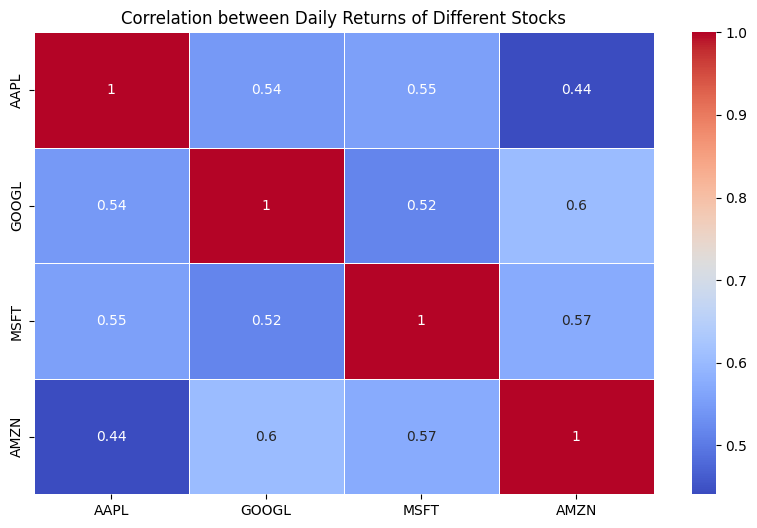

In [124]:
daily_returns_df = pd.concat([data['Daily Return'] for data in stock_data_dict.values()], axis=1)
daily_returns_df.columns = tech_stocks

plt.figure(figsize=(10, 6))
sns.heatmap(daily_returns_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation between Daily Returns of Different Stocks')
plt.show()